In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [7]:
data = pd.read_csv('Credit_card_dataset.csv')

In [8]:
# Basic data exploration
print(data.head())
print(data.info())
print(data.describe())

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 

In [9]:
# Data preparation
# Check for missing values
print(data.isnull().sum())


CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [16]:
# Impute missing values
data.fillna(method='ffill', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19052\682398557.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


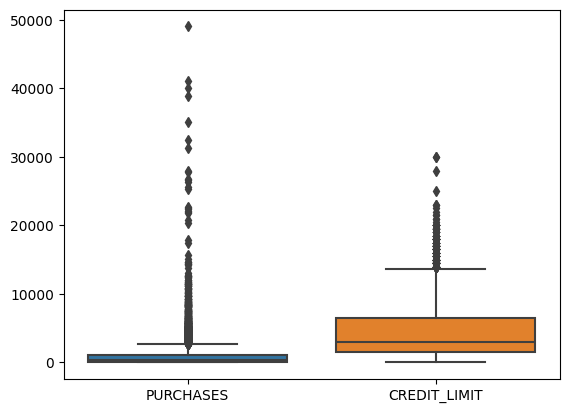

In [10]:
# Check for outliers
sns.boxplot(data=data[['PURCHASES', 'CREDIT_LIMIT']])
plt.show()


In [23]:
# Hierarchical clustering
# Select features for clustering
X = data[['PURCHASES', 'CREDIT_LIMIT',]]

In [24]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Perform hierarchical clustering
# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

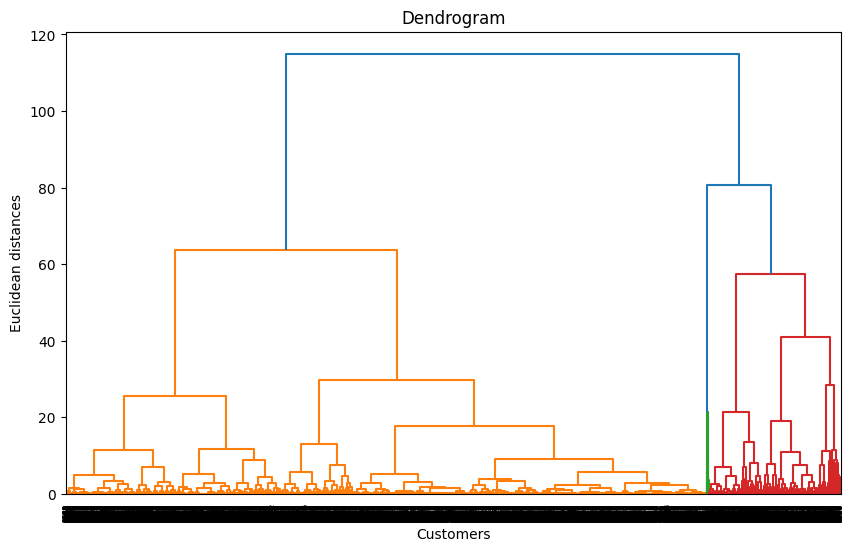

In [26]:
# Plot dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 6))
dendrogram = dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



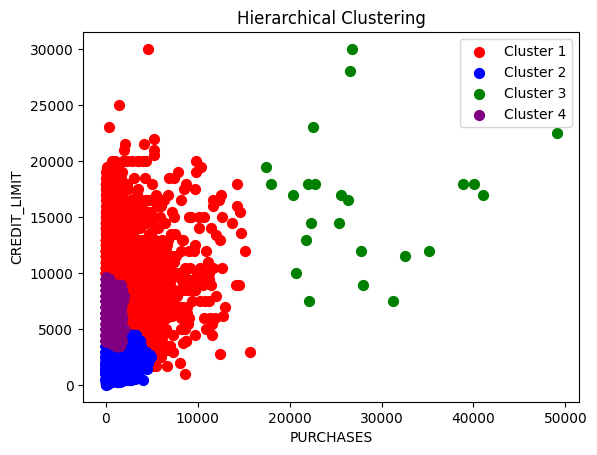

In [27]:
# Plot clusters
plt.scatter(X[y_hc == 0]['PURCHASES'], X[y_hc == 0]['CREDIT_LIMIT'], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1]['PURCHASES'], X[y_hc == 1]['CREDIT_LIMIT'], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2]['PURCHASES'], X[y_hc == 2]['CREDIT_LIMIT'], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3]['PURCHASES'], X[y_hc == 3]['CREDIT_LIMIT'], s=50, c='purple', label='Cluster 4')
plt.title('Hierarchical Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()

In [29]:
# K-means clustering
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

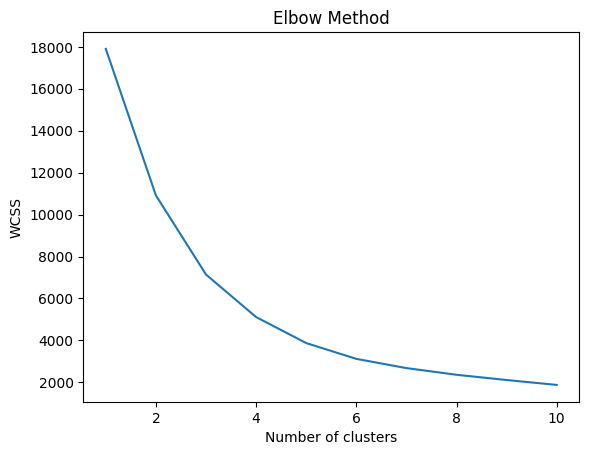

In [30]:

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

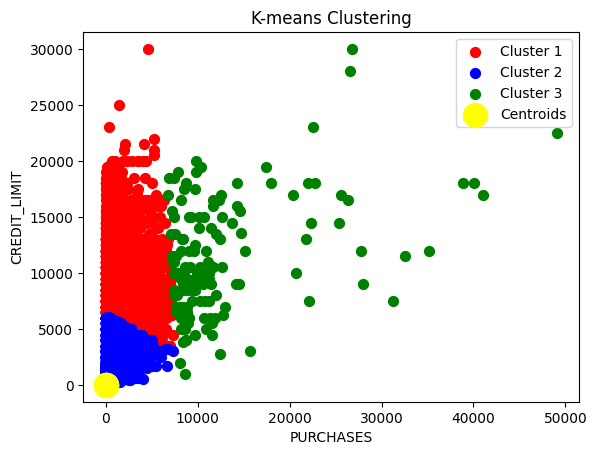

In [32]:
# Plot clusters
plt.scatter(X[y_kmeans == 0]['PURCHASES'], X[y_kmeans == 0]['CREDIT_LIMIT'], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['PURCHASES'], X[y_kmeans == 1]['CREDIT_LIMIT'], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['PURCHASES'], X[y_kmeans == 2]['CREDIT_LIMIT'], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()
